# Plant Identification using Deep Learning

In [1]:
%matplotlib inline

In [2]:
from fastai.vision.all import *
from nbdev.showdoc import *

set_seed(42)

In [3]:
torch.cuda.set_device(1)

In [4]:
bs = 128

In [5]:
path = 'plant_seedlings_v2'

In [6]:
image_files = get_image_files(path); image_files

(#5539) [Path('plant_seedlings_v2/black_grass/1.png'),Path('plant_seedlings_v2/black_grass/10.png'),Path('plant_seedlings_v2/black_grass/100.png'),Path('plant_seedlings_v2/black_grass/101.png'),Path('plant_seedlings_v2/black_grass/102.png'),Path('plant_seedlings_v2/black_grass/103.png'),Path('plant_seedlings_v2/black_grass/104.png'),Path('plant_seedlings_v2/black_grass/105.png'),Path('plant_seedlings_v2/black_grass/106.png'),Path('plant_seedlings_v2/black_grass/107.png')...]

## Data Loading

In [7]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                       get_items = get_image_files,
                       get_y = parent_label,
                       splitter = RandomSplitter(valid_pct=0.2,seed=42),
                       item_tfms = Resize(224),
                       batch_tfms = Normalize.from_stats(*imagenet_stats))

In [8]:
dls=dblock.dataloaders(path, bs=128)

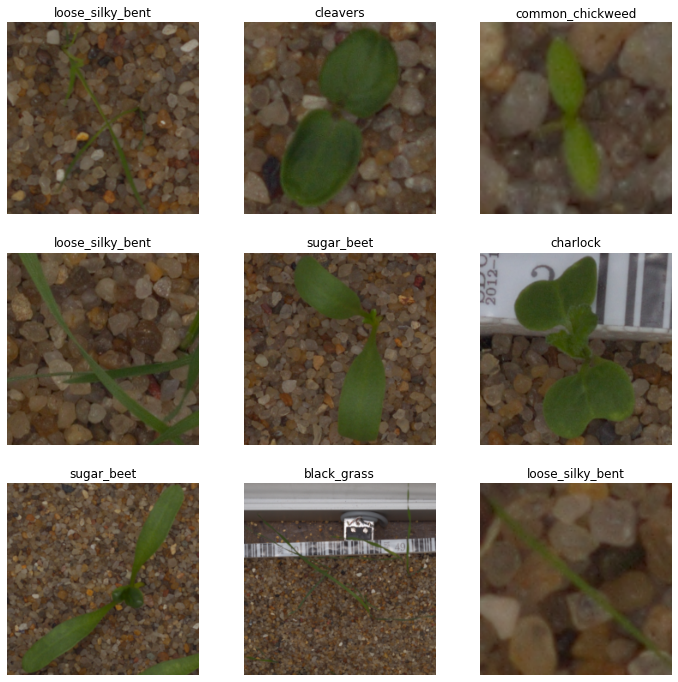

In [9]:
dls.show_batch(max_n=9, figsize=(12,12))

## Learning

In [10]:
learn = cnn_learner(dls,resnet50,metrics=error_rate)

/home/ele_group_2/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/home/ele_group_2/miniconda3/lib/python3.9/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0004786300996784121)

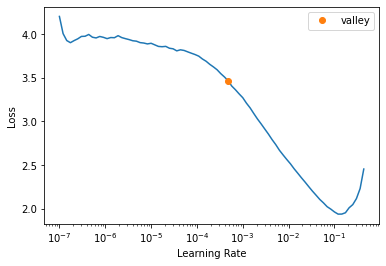

In [11]:
learn.lr_find()

In [12]:
learn.fit_one_cycle(4, lr_max=slice(2e-3,1e-1))

epoch,train_loss,valid_loss,error_rate,time
0,1.280255,3.167082,0.291780,00:11
1,1.094956,0.945572,0.224932,00:11
2,0.651556,0.353479,0.090334,00:11
3,0.390674,0.217233,0.056911,00:10


In [13]:
print("Accuracy: ", 1-float(learn.recorder.metrics[0].value))

Accuracy:  0.9430894292891026


In [14]:
learn.save('stage-1')

Path('models/stage-1.pth')

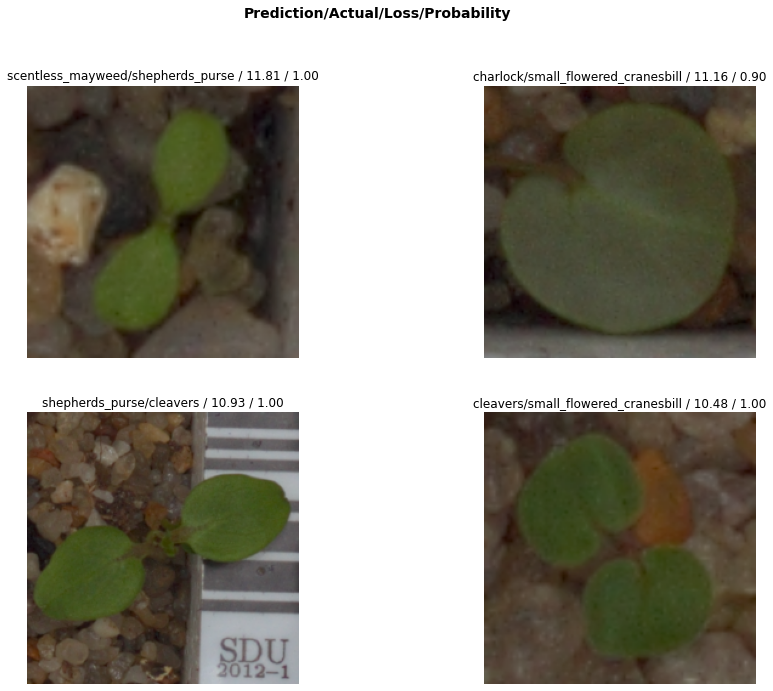

In [15]:
interpretation = ClassificationInterpretation.from_learner(learn)
losses, indices = interpretation.top_losses()
interpretation.plot_top_losses(4, figsize=(15,11))

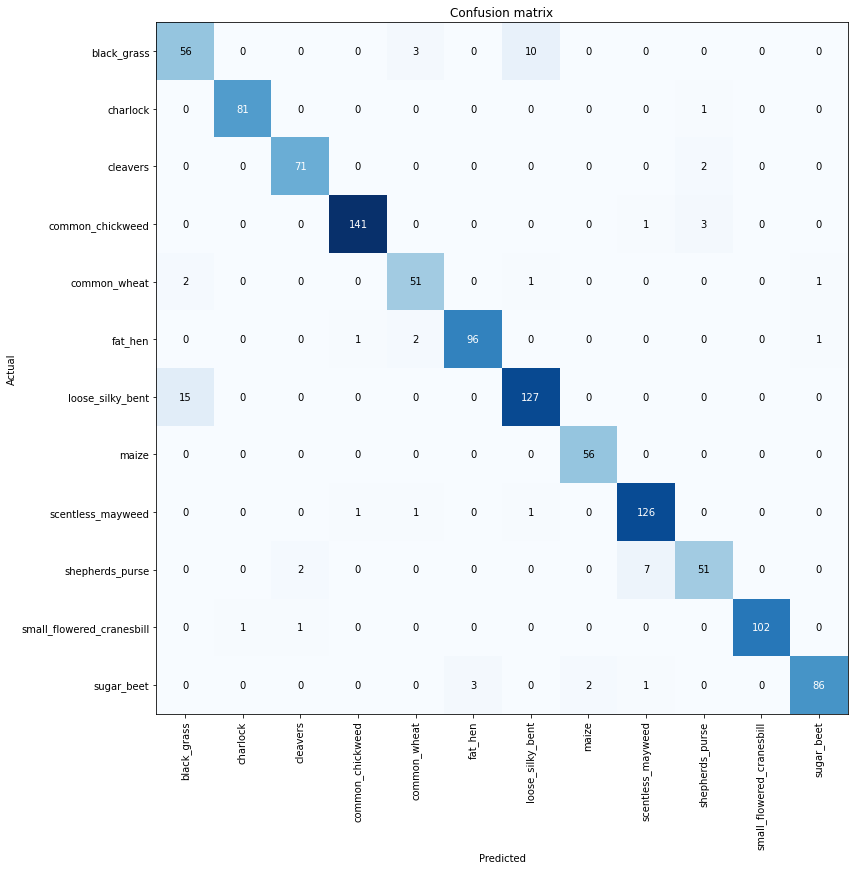

In [16]:
interpretation.plot_confusion_matrix(figsize=(12,12))

In [17]:
interpretation.most_confused(min_val=2)

[('loose_silky_bent', 'black_grass', 15),
 ('black_grass', 'loose_silky_bent', 10),
 ('shepherds_purse', 'scentless_mayweed', 7),
 ('black_grass', 'common_wheat', 3),
 ('common_chickweed', 'shepherds_purse', 3),
 ('sugar_beet', 'fat_hen', 3),
 ('cleavers', 'shepherds_purse', 2),
 ('common_wheat', 'black_grass', 2),
 ('fat_hen', 'common_wheat', 2),
 ('shepherds_purse', 'cleavers', 2),
 ('sugar_beet', 'maize', 2)]

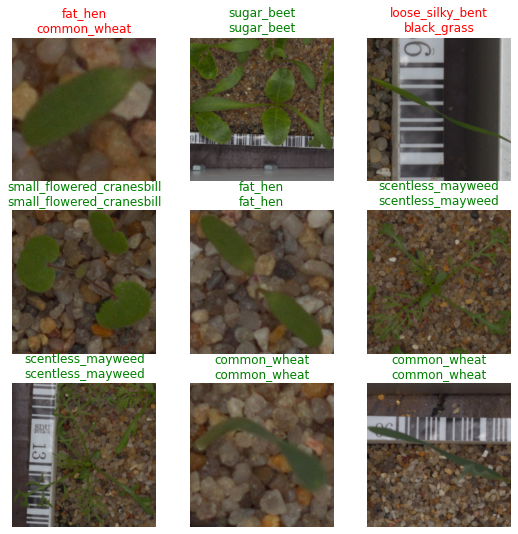

In [18]:
learn.show_results()

## Prediction

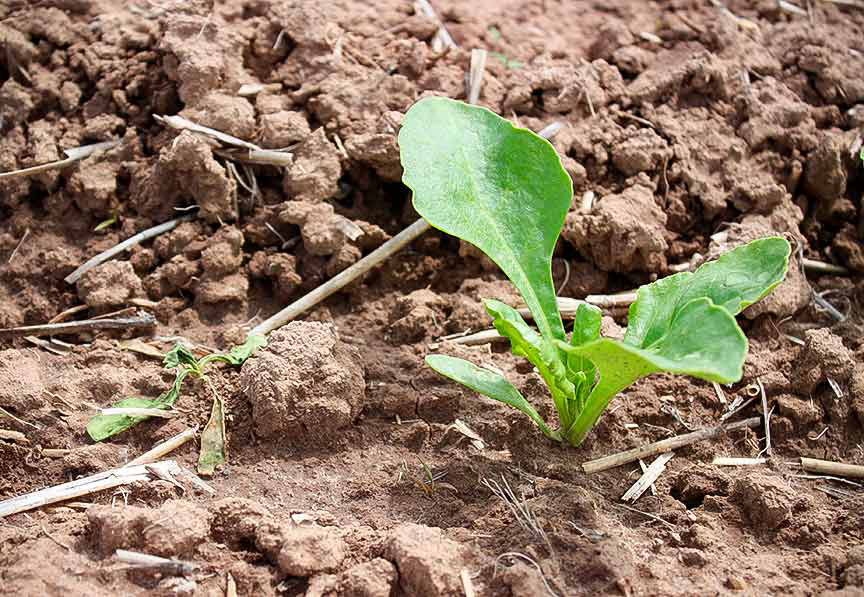

In [19]:
image_path = '123.png'
img=load_image(image_path)
img

In [20]:
label,_,probs = learn.predict(image_path)
print(label.split('/')[-1])
print(max(probs))

sugar_beet
tensor(0.5246)


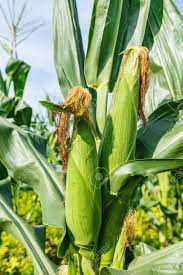

In [41]:
image_path1 = 'competition_group2/group2_dataset/076.jpg'
img1=load_image(image_path1)
img1

In [42]:
label,_,probs = learn.predict(image_path1)
print(label.split('/')[-1])
print(max(probs))

maize
tensor(0.9935)


In [45]:
learn.export('competition_group2/competition_group_2.pkl')